# Criticality and Cascades

#### Table of Contents:
1. Up-down states in the cerebral cortex
2. Critical cascade in a (neural) network
3. The equilibrium parameter

#### Learning Goals
1. Understand what criticality is and how it arises.
2. Know where criticality appears in nature and how it might applied.

In [10]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np

# Understanding Criticality
Criticality in our brain refers to a state in which your brain operates near a <u>phase transition</u> point between <u>order</u> and <u>chaos</u>.  
To get a better understanding of this definition will we explain each of the components using a model that we intuitivly understand more.  
This model is the Ising model.

## The Ising model
The Ising model consits of magnetic dipole moments of atomic "spins" that can be in two states, an up spin (+1) or a down spin (-1).  
Each magnetic dipole moment is located on a grid or lattice like in the figure below. Now lets take a closer look at this specific state.   
Each spin is influenced by its neighbors. So in this state the dipole moment in the circle has an up spin while all its neighbors have a down spin.  
This causes the dipole moment in the circle to flip from an up state to a down state like you can see in the figure below.

<div style="display: flex;">
  <div style="flex: 1; padding: 10px;">
    <img src="images/Ising model 1.png" style="width:100%">
  </div>
  <div style="flex: 1; padding: 10px;">
    <img src="images/Ising model 2.png" style="width:100%">
  </div>
  <div style="flex: 1; padding: 10px;">
    <img src="images/Ising model still.png" style="width:100%">
  </div>
</div>

Each individual spin ($\sigma_i$) has a chance to flip or change it spin direction. The rate of change of spin direction is given by the Boltzmann distribution like so:  
$$
P(\sigma_i) \propto e^{-\frac{E}{k_bT}}
$$
Where $P(\sigma_i)$ represent the probability of a specific spin configuration ($\sigma_i$) to change from spin., E is the energy of the configuration, $k_b$ is the Boltzmann constant, and T is the temperature.  
As you can see when the temperature(T) increases the exponent becomes smaller, indicating a higher probability for spin flips to occur. You can see this relationship happening of you run the code for the plot below.

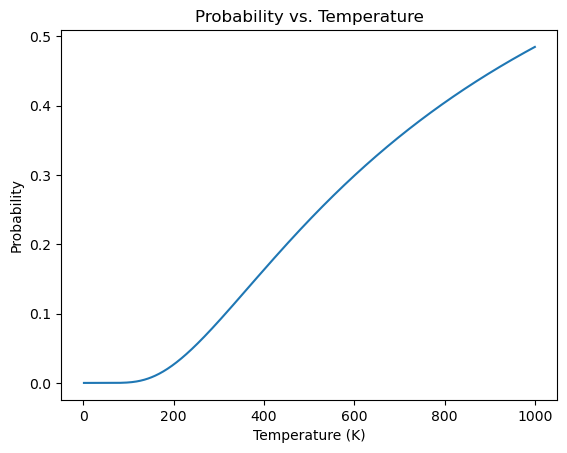

In [7]:
def plot_probability_spin_configuration():
    kb = 1.38e-23
    E = 1e-20
    # Temperature in kelvin
    T = np.linspace(1, 1000, 1000)
    P = np.exp(-E/(kb * T))

    plt.plot(T,P)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Probability")
    plt.title("Probability vs. Temperature")
    plt.show()

plot_probability_spin_configuration()

As we raise the system's temperature, the likelihood of spin flips occurring becomes higher. When the temperature reaches a sufficiently high level, it becomes less likely for all spins to align consistently. This phenomenon leads to a transition, as depicted in the images below. As you look from left to right, the temperature increases, and in the final image, you can observe the absence of any discernible structure.

<center>
<figure>
<img src="images/Ising model phase transition.png" style="width:30%">
</figure>
</center>

A <u>phase transition</u> has occured, and you can clearly see which one of the states represent the <u>order</u> state and the <u>chaos</u> state.  
Now to find this point of criticality for our model or the critical temperature, we need to use some parameter to find this critical temperature.  
When magnetic dipole moments are aligned will this result in a strong overall magnetic field. When we lose this alignment we lose our magnetic field.  
Thus we can use magnetism ($M$) to find this critical temperature. The magnetization ($M$) can be expressed as follows:  
$$M = \frac{1}{N} \sum_i \langle\sigma_i\rangle$$  
Where N is the the total number of atoms, and $\sigma_i$ represents the spin at site $i$. The $\langle\rangle$ denote that we take the average of the spin sites.  
Below you can see how such a magnetism curve would looke like with increasing temperature.  
As you can see there is a steep transition from having magnetism to not having magnetism. When looking at phase transitions and you are trying to find this transition point you try to compare two parameters with each other.  
These are then called the order parameter and control parameter. In the Ising model the order parameter is magnetism and the control parameter is the temperature.

<div style="display: flex;">
  <div style="flex: 1; padding: 10px;">
    <img src="images/Magnetism vs temp.png" style="width:100%">
  </div>
  <div style="flex: 1; padding: 10px;">
    <img src="images/Order vs control parameters.png" style="width:100%">
  </div>
</div>

What the order and control parameters are in your brain is not really clear. We know that there are two different phases (up and down states), but how do we find criticallity then?

## The power law

Another way to find the criticality or critical point is to look at a power law relation.  
A power law is a mathematical relationship between two quantities, where a relative change in one quantity results in a relative change in the other quantity proportional to a power of the change.  
In other words, when one variable increases or decreases, the other variable responds in a manner determined by  an exponent or power.   
An easy example is the area of a square. If you were to double the length of its sides then the area will multiply by a factor of four.  This results in a power law of 2 between the variable length and area of a square.
$$
Area_{square} = L^2 \quad \text{when} \quad L \rightarrow 2L \quad \text{then} \quad (2L)^2 = 4L^2 = 4 \cdot Area_{square}
$$
Below you can run the code to see that there is a power law relation when the log-log plot of the variables is linear.

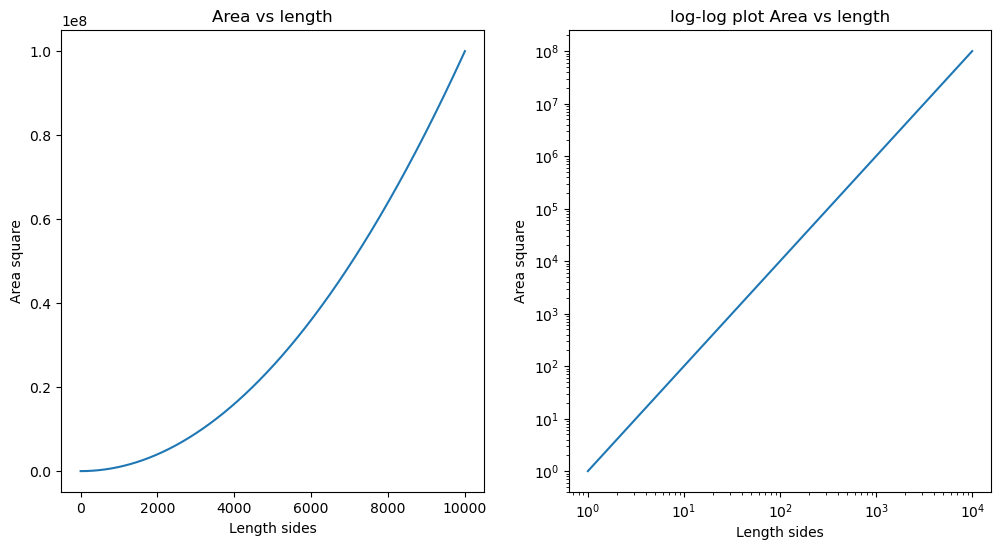

In [8]:
def plot_area_length():
    L = np.linspace(1,10000,1000)
    A = L**2



    fig, ax = plt.subplots(1,2, figsize = (12,6))
    ax[0].plot(L,A)
    ax[1].loglog(L,A)
    ax[0].set(xlabel='Length sides', ylabel='Area square')
    ax[1].set(xlabel='Length sides', ylabel='Area square')
    ax[0].set_title("Area vs length")
    ax[1].set_title("log-log plot Area vs length")


plot_area_length()

In the Ising model if you plot the correlation lenght between two spins vs the temperature then you can find the power law.  
The correlation length between two spins represents the distance over which the flipping of one spin is correlated with the flipping of another spin.  
This correlation is shown in the first figure below.  
As you can see if the temperature is lower than the critical temperature is the correlation lenght low. However as we come closer to the critical temperature does the correlation length peak. Beyond the critical temperature does the correlation length decrease again.  
If we plot the correlation of all these spins against the distance and create a log-log plot, we observe a linear relationship, as demonstrated in the second figure below. 
This linear relationship only counts when we take $T$ to be the critical temperature.  
You can see that this is true in the third figure below, as the lower temperature or higher temeprature don't have an exponential relationship.

<div style="display: flex;">
  <div style="flex: 1; padding: 10px;">
    <img src="images/Correlation length vs temp.png" style="width:100%">
  </div>
  <div style="flex: 1; padding: 10px;">
    <img src="images/Correlation vs distance log log .png" style="width:100%">
  </div>
  <div style="flex: 1; padding: 10px;">
    <img src="images/Correlation vs distance.png" style="width:100%">
  </div>
</div>

# Up and down states in the cerebral cortex
What are up and down states in the brain?  
The up state is a period of increased neural activity and excitation. This looks like spikes rapidly firing one after another like you can see in the figure below in A.  
The down state looks like no spiking activity from the neurons. This is visualized in the figure below in B.  
Another group is going to explain some more how these up and down states arise and what they are in a biological context. We are going to focus more on the criticality and cascades of the brain.

<center>
<figure>
<img src="images/Up and down state.png" style="width:30%">
</figure>
</center>

# Critical cascades in your brain

Neuronal avalanches, coined by John M. Beggs and Dietmar Plenz in 2003, describe critical cascades in neurons.  
Using an 8x8 multielectrode array (as depicted in the first figure), they monitored rat somatosensory cortex spiking activity.  
The emerging pattern involves a few neurons randomly firing, triggering others to activate. This domino effect continues, creating a cascade of neuron firing until all neurons are active simultaneously.  
However, since neurons can't fire in close succession, the firing quickly subsides, resulting in the observed neuronal avalanche pattern (as shown in the second figure).

<div style="display: flex;">
  <div style="flex: 1; padding: 10px;">
    <img src="images/2003 paper.png" style="width:100%">
  </div>
  <div style="flex: 1; padding: 10px;">
    <img src="images/Avalanche pattern.png" style="width:100%">
  </div>
</div>

John and Dietmar generated log-log plots correlating the probability of an avalanche occurrence with various avalanche sizes, revealing the presence of power laws (as show in the figure below).

<center>
<figure>
<img src="images/power law 2003.png" style="width:50%">
</figure>
</center>

The abundance of power laws suggest that the rat cortex exhibits criticality (or that it is near the point of phase transition), the question arises: which factor determines whether the cortex transitions into an up state or a down state?

# The equilibrium parameter

The equilibrium or control parameter in the context of neurons is the weight assigned between them.  
When one neuron activates and forms a connection with another, the signal is transmitted between them. This signal is then multiplied by the weight, either amplifying or diminishing the signal between the neurons.  
Increasing the connection weights raises the likelihood of a random neuron activation initiating a neuronal avalanche.  
Reducing the weight decreases the likelihood of a random neurons activating to trigger a neuronal avalanche.  
If we plot the number of spikes of the neurons against the time (as you can see in the figures below) you can clearly see that you shift triggering no neuronal avalanches to activating some every few time steps, as the weight increases.  

In general when the control parameter is below the critical value your system is in a subcritical state. If the parameter is at the critical value you system is in critical state and when the parameter is above the critical value your system is in supercritical state.
All these states are shown in the figure below.

<div style="display: flex;">
  <div style="flex: 1; padding: 10px;">
    <img src="images/sub critical weight.png" style="width:100%">
  </div>
  <div style="flex: 1; padding: 10px;">
    <img src="images/critical weight.png" style="width:100%">
  </div>
  <div style="flex: 1; padding: 10px;">
    <img src="images/supercritical weight.png" style="width:100%">
  </div>
</div>


## A model for critical cascades

### Why make computer model?

These phenomena in the cortex lend themselves to research *in-silico*, using computers to simulated groups of neurons. Such simulations allow researchers precise control over various parameters, such as the number of neurons, how they are connected, and the strength of those connections. Using this control, these parameters can be precisely manipulated investigate how they influence the occurrence, propagation, and characteristics of criticality. As you might know, such control is difficult to achieve in biological experiments.

One of the main goals for researchers in this field is the development of mathematical models and theories about neural processes like the emergence of critical cascades. Simulations provide a means to rigorously test these hypotheses and models. By creating computational models based on their theoretical understanding of neural avalanches, researchers can validate their model by comparing their predictions to the real thing. Such models often allow for much deeper insights into the dynamics of neural avalanches.

### The Leaky Integrate and Fire Neuron
There are various types artificial neural network one category being **spiking neural networks (SNNs)**. These networks model the behavior of individual neurons and their interactions through action potentials or **spikes**, similar to real neurons in the brain.

**Leaky Integrate and Fire (LIF)** neurons are a type of biological neuron model used to build SNNs. LIF neurons are frequently employed in research due to their simplicity and ability to capture essential neural dynamics. LIF neurons operate by continuously integrating incoming electrical signals over time, with a gradual leakage of charge. When the accumulated charge reaches a predefined firing threshold, the neuron generates a spike, representing the firing of an action potential. Following a spike, the neuron resets, simulating the refractory period observed in real neurons.

> <p style="color:blue;"><font size="3"> 🖥️ Demo  </font></p>
> 
> The code below defines a working LIF neuron written and simulated using the [Brain Simulator](https://briansimulator.org/) package. Run the code below to setup a single LIF neuron, which recieves an input pulse at 20, 60, and 80 m.

In [9]:
defaultclock.dt = 0.1 * ms

neuron = NeuronGroup(1,
                      """
                      dv/dt = -v/tau : volt (unless refractory)
                      """,
                      threshold="v > theta",
                      reset="v = V_r",
                      refractory=2 * ms,
                      method="exact",
)

# Input spike paramaters
times = array([20, 60, 80]) * ms

inp = SpikeGeneratorGroup(1,np.zeros_like(times), times)
input_synapse = Synapses(inp, neuron, on_pre="v += strength", delay=0 * ms)
input_synapse.connect()

# Record voltage
voltage_monitor = StateMonitor(neuron, 'v', record=True)

store()

DimensionMismatchError: Function '__init__' expected a quantitity with unit 1 for argument 'indices' but got '[0. 0. 0.] s' (unit is s).

> <p style="color:blue;"><font size="3"> 🖥️ Demo  </font></p>
> 
> The code above only needs to be run once. The model is stored using the `store` function in the last line of the code above. Now, using the code below, the model is given parameters and simulated for 100 ms, after which the three resulting spikes are plotted. Note that the parameter `strength` can be changed, changing the strength of the pulses applied to the neuron. Try increasing and decreasing this value. Also consider comparing it to `theta`, i.e. what happens if `strength` > `theta` and vice-versa?

Text(0, 0.5, 'Voltage [mV]')

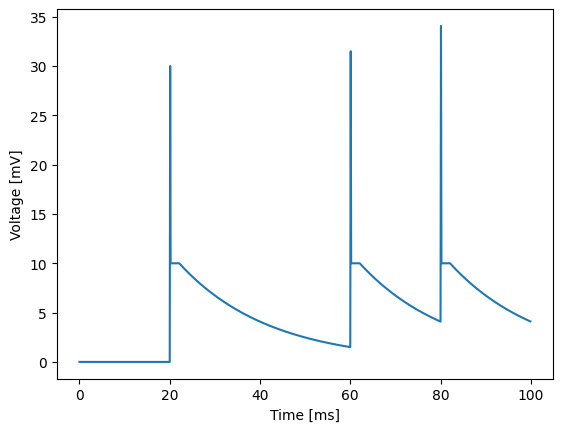

In [3]:
# neuron parameters
tau = 20 * ms
theta = 20 * mV
V_r = 10 * mV

# Input parameters
strength = 30 * mV

restore()

# Run for 100 ms
run(100 * ms)

plt.plot(voltage_monitor.t / ms, voltage_monitor.v.T / mV)
plt.xlabel('Time [ms]')
plt.ylabel('Voltage [mV]')


LIF neurons are favored in research because of their computational efficiency and mathematical tractability, which make them suitable for simulating large-scale neural networks and studying fundamental principles of information processing. By adjusting parameters like the leak rate and firing threshold, LIF neurons can be fine-tuned to reproduce various neural behaviors. These neurons can then be assembled into networks can perform tasks ranging from signal processing, to memory storage, and pattern recognition, offering insights into the computational capabilities of the brain.

## Recurrent Neural Networks

<center>
<figure>
<img src="images/recurrent_neural_network_kanders.png" style="width:80%">
<figcaption align = "center"><i> Recurrent Neural Network. Adapted from Kanders et. al. </i></figcaption>
</figure>
</center>


In [3]:
from utils.simulate import RecurrentNeuralNetwork

In [4]:
rnn = RecurrentNeuralNetwork(n=1000)
rnn.store()

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


In [5]:
rnn.set_w(11)
rnn.sim(1200)

Starting simulation at t=0. s for a duration of 1.2 s
1.2 s (100%) simulated in 4s


1

(<Figure size 640x480 with 2 Axes>,
 array([<Axes: xlabel='Time [ms]', ylabel='Neuron'>,
        <Axes: ylabel='Voltage [mV]'>], dtype=object))

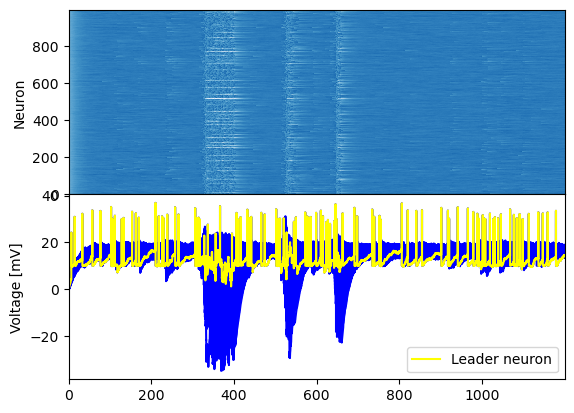

In [6]:
rnn.plot_voltage()

In [ ]:
Gedenkt door andere teams:
- Wat zijn up/down states
- Wat is de biological function (in slaap)
- Simuleren met potential spikes
- Modeleren met neuronen en kijken naar spikes

## AI Statement

## References

Beggs, J. M., & Plenz, D. (2003). Neuronal avalanches in neocortical circuits. Journal of neuroscience, 23(35), 11167-11177.

Kanders, K., Lorimer, T., & Stoop, R. (2017). Avalanche and edge-of-chaos criticality do not necessarily co-occur in neural networks. Chaos: An Interdisciplinary Journal of Nonlinear Science, 27(4).

Holcman, D., & Tsodyks, M. (2006). The emergence of up and down states in cortical networks. PLoS computational biology, 2(3), e23.